<a href="https://colab.research.google.com/github/AlexeiAltamira/Portfolio/blob/main/Violencia_contra_mulher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd # Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import matplotlib.pyplot as plt # Importar a biblioteca para criação de gráficos

In [131]:
# Os arquivos originais no site estam no formato CSV. Mas o formato é mais compativel com excel por ja estarem em colunas separadas
#e não por nenhum sinal. Abri individualmente cada arquivo e salvei no formato do excel
mulher_2010 = pd.read_excel('/content/dados_violencia_mulheres_ses_2010.xls')
mulher_2011 = pd.read_excel('/content/dados_violencia_mulheres_ses_2011.xls')
mulher_2012 = pd.read_excel('/content/dados_violencia_mulheres_ses_2012.xls')
mulher_2013 = pd.read_excel('/content/dados_violencia_mulheres_ses_2013.xls')
mulher_2014 = pd.read_excel('/content/dados_violencia_mulheres_ses_2014.xls')
mulher_2015 = pd.read_excel('/content/dados_violencia_mulheres_ses_2015.xls')
mulher_2016 = pd.read_excel('/content/dados_violencia_mulheres_ses_2016.xls')
mulher_2017 = pd.read_excel('/content/dados_violencia_mulheres_ses_2017.xls')
mulher_2018 = pd.read_excel('/content/dados_violencia_mulheres_ses_2018.xls')
mulher_2019 = pd.read_excel('/content/dados_violencia_mulheres_ses_2019.xls')
mulher_2020 = pd.read_excel('/content/dados_violencia_mulheres_ses_2020.xls')
mulher_2021 = pd.read_excel('/content/dados_violencia_mulheres_ses_2021.xls')
mulher_2022 = pd.read_excel('/content/dados_violencia_mulheres_ses_2022.xls')
mulher_2023 = pd.read_excel('/content/dados_violencia_mulheres_ses_2023.xls')

#Origem dos dados: https://dados.gov.br/dados/conjuntos-dados/dados_violencia_geral_ses

In [132]:
# Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado os dados iniciais
mulher_2010.head(2)

,DT_NOTIFIC,DT_NASC,NU_IDADE_N,CS_SEXO,CS_RACA,ID_MN_RESI,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_FISIC,VIOL_PSICO,VIOL_SEXU,NUM_ENVOLV,AUTOR_SEXO,ORIENT_SEX,IDENT_GEN
0,03/08/2010,02/11/1937,72,Feminino,Parda,Governador Valadares,Residencia,Sim,Não,Sim,Sim,Não,Um,Masculino,NaN,NaN
1,07/02/2010,30/04/1992,17,Feminino,Parda,Montes Claros,Residencia,Ignorado,Não,Sim,Sim,NaN,Um,Masculino,NaN,NaN


In [133]:
# Cria uma tupla com os nomes de todos os arquivos em uso
arquivo = (mulher_2010, mulher_2011, mulher_2012, mulher_2013, mulher_2014, mulher_2015, mulher_2016, mulher_2017, mulher_2018, mulher_2019,
           mulher_2020, mulher_2021, mulher_2022, mulher_2023)

In [134]:
# Realiza contagem de valores nulos em todas as colunas
mulher_2010.isna().sum()

DT_NOTIFIC       0
DT_NASC        213
NU_IDADE_N       0
CS_SEXO          0
CS_RACA        139
ID_MN_RESI      16
LOCAL_OCOR     153
OUT_VEZES      174
LES_AUTOP      694
VIOL_FISIC     185
VIOL_PSICO     532
VIOL_SEXU      525
NUM_ENVOLV     106
AUTOR_SEXO     144
ORIENT_SEX    4297
IDENT_GEN     4297
dtype: int64

In [135]:
# Cria uma função para substituir os valores nulos pelo valor especificado.
def nulos (fonte_dados, coluna, substituto):
  fonte_dados[coluna] = fonte_dados[coluna].fillna(substituto)

In [136]:
ano = 2010
for todos in arquivo:
# Na base dos dados, após analise, observou-se que todos os dados nulos na coluna de idade também tinham dados nulos na coluna data de nascimento.
# O que impossibilidad qualquer tipo de calculo. Opto, para não excluir o dado, em substituir esse dado faltante pelo valor inteiro da média
  nulos(todos, 'NU_IDADE_N', (int(todos['NU_IDADE_N'].mean())))

# Coluna de data de nascimento não apresenta uso importante. Opto por substituir, nas linhas que são possível, pela subtração do ano da denuncia pela idade registrada.
  nulos(todos, 'DT_NASC', f'{(ano-todos["NU_IDADE_N"])}-01-01')

# Nas colunas a seguir, como são colunas relevantes, opto por substituir os valores nulos por 'Não informado'. Para não ocorrer perda de dados.
  nulos(todos, 'CS_RACA', 'Ignorado')
  nulos(todos, 'ID_MN_RESI', 'Não informado')
  nulos(todos, 'LOCAL_OCOR', 'Não informado')
  nulos(todos, 'OUT_VEZES', 'Não informado')
  nulos(todos, 'LES_AUTOP', 'Não informado')
  nulos(todos, 'VIOL_FISIC', 'Não informado')
  nulos(todos, 'VIOL_PSICO', 'Não informado')
  nulos(todos, 'VIOL_SEXU', 'Não informado')
  nulos(todos, 'NUM_ENVOLV', 'Não informado')
  nulos(todos, 'AUTOR_SEXO', 'Não informado')
  nulos(todos, 'ORIENT_SEX', 'Não informado')
  nulos(todos, 'IDENT_GEN', 'Não informado')
  ano += 1


Oscilação de denuncias por ano

In [137]:
# Contagem de quantas denuncias houveram em cada ano
oscilacao_ano = {}
anos = []
quantidade = []
for loop in range(0, 14):
  anos.append(loop+2010)
  quantidade.append(len(arquivo[loop]))
oscilacao_ano['Ano'] = anos
oscilacao_ano['N_denuncias'] = quantidade
#oscilacao_ano = pd.DataFrame(oscilacao_ano)

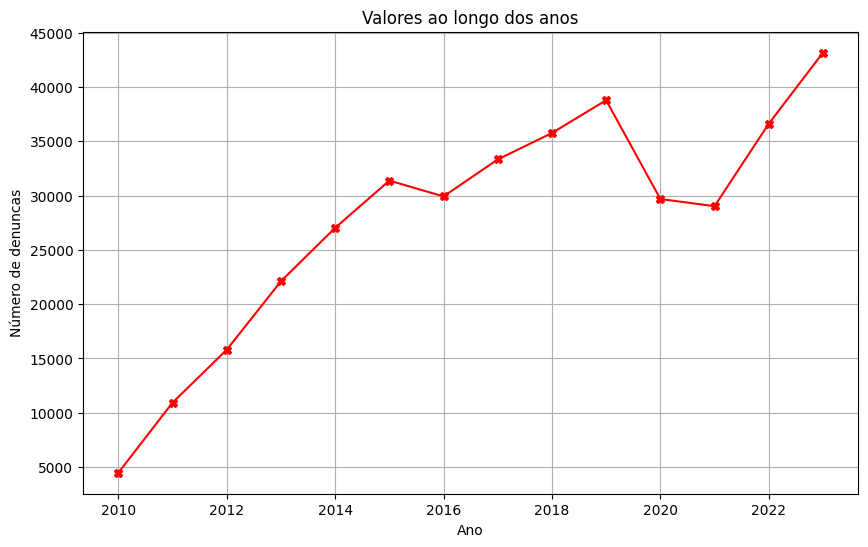

In [138]:
# Criando o gráfico de linhas com oscilação de denuncias realizadas por ano
plt.figure(figsize=(10, 6))
plt.plot(oscilacao_ano["Ano"], oscilacao_ano["N_denuncias"], marker='X', linestyle='-', color='r')
plt.title("Valores ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Número de denuncas")
plt.grid(True)
plt.show()

In [139]:
#Identificar se há valores menores que 0 na coluna idade. O que pode ser observado nos dados coletados em 2016
ano = 2010
for todos in arquivo:
  print(ano)
  print(todos[todos['NU_IDADE_N']<0]['NU_IDADE_N'])
  ano += 1

2010
Series([], Name: NU_IDADE_N, dtype: int64)
2011
Series([], Name: NU_IDADE_N, dtype: int64)
2012
Series([], Name: NU_IDADE_N, dtype: float64)
2013
Series([], Name: NU_IDADE_N, dtype: float64)
2014
Series([], Name: NU_IDADE_N, dtype: float64)
2015
Series([], Name: NU_IDADE_N, dtype: float64)
2016
7954   -1.0
Name: NU_IDADE_N, dtype: float64
2017
Series([], Name: NU_IDADE_N, dtype: float64)
2018
Series([], Name: NU_IDADE_N, dtype: float64)
2019
Series([], Name: NU_IDADE_N, dtype: float64)
2020
Series([], Name: NU_IDADE_N, dtype: int64)
2021
Series([], Name: NU_IDADE_N, dtype: float64)
2022
Series([], Name: NU_IDADE_N, dtype: int64)
2023
Series([], Name: NU_IDADE_N, dtype: float64)


In [140]:
# Mostrar no arquivo de 2016 a linha identificada com valor de idade menor que zero. Observa-se também que a data de notificação é menor que a data de nascimento.
mulher_2016.iloc[7954]

DT_NOTIFIC               18/04/2016
DT_NASC                  11/09/2016
NU_IDADE_N                     -1.0
CS_SEXO                    Feminino
CS_RACA                       Parda
ID_MN_RESI    São Sebastião do Anta
LOCAL_OCOR               Residencia
OUT_VEZES                       Sim
LES_AUTOP                       Sim
VIOL_FISIC                      Sim
VIOL_PSICO                      Sim
VIOL_SEXU                       Não
NUM_ENVOLV                       Um
AUTOR_SEXO                Masculino
ORIENT_SEX                 Ignorado
IDENT_GEN                  Ignorado
Name: 7954, dtype: object

In [141]:
# Deixando no dataframe apenas as idades maiores e iguais a zero
mulher_2016 = mulher_2016[mulher_2016['NU_IDADE_N']>= 0]

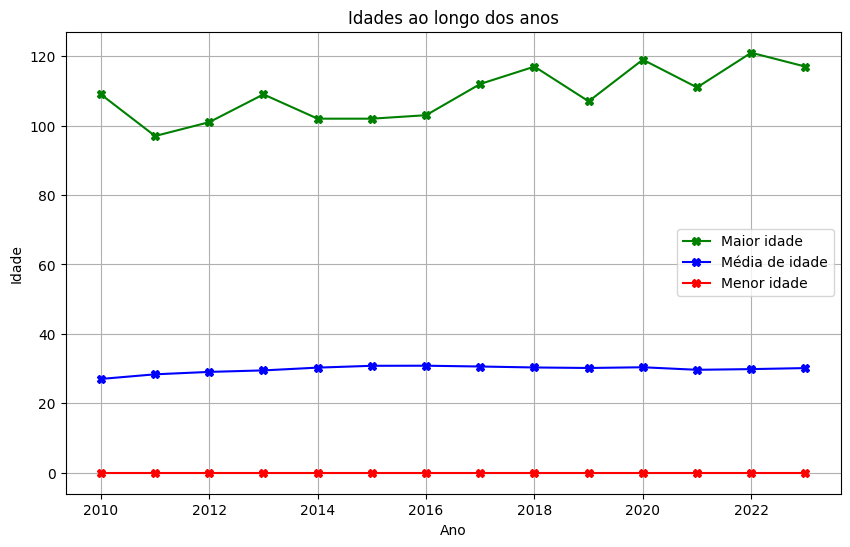

In [142]:
# Criar um gráfico de linhas, com 3 linhas, menor, maior e médias da idade de cada ano
menor_idade = []
maior_idade = []
media_idade = []

for year in arquivo:
  menor_idade.append(year["NU_IDADE_N"].min())
  maior_idade.append(year["NU_IDADE_N"].max())
  media_idade.append(year["NU_IDADE_N"].mean())

menor_idade[6] = 0 #Altera a menor idade de 2016 (valor menor que zero) para zero

# Criando o gráfico de linhas com as idades
plt.figure(figsize=(10, 6))
plt.plot(anos, maior_idade, marker='X', linestyle='-', color='g', label="Maior idade")
plt.plot(anos, media_idade, marker='X', linestyle='-', color='b', label="Média de idade")
plt.plot(anos, menor_idade, marker='X', linestyle='-', color='r', label="Menor idade")
plt.title("Idades ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Idade")
plt.legend()
plt.grid(True)
plt.show()


Faixa etária / Idade das vítimas

<ipython-input-143-9aa8ed2625ae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mulher_ano_atual['Faixa de Idade'] = pd.cut(mulher_ano_atual['NU_IDADE_N'], bins=range(0, 120, 20))


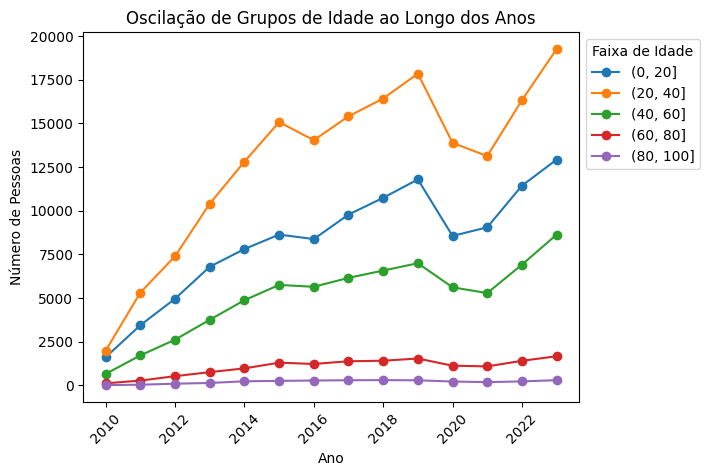

In [143]:
# Lista para armazenar os resultados de cada ano
resultados_por_ano = []

# Loop pelos anos
for ano in anos:
    # Seleciona o dataframe correspondente ao ano atual
    mulher_ano_atual = globals()[f'mulher_{ano}']

    # Calcula a faixa de idade para cada registro
    mulher_ano_atual['Faixa de Idade'] = pd.cut(mulher_ano_atual['NU_IDADE_N'], bins=range(0, 120, 20))

    # Conta o número de pessoas em cada faixa de idade
    contagem_por_grupo = mulher_ano_atual['Faixa de Idade'].value_counts().sort_index()

    # Adiciona os resultados para o ano atual à lista
    resultados_por_ano.append(contagem_por_grupo)

# Concatena os resultados de todos os anos em um único dataframe
resultados_totais = pd.concat(resultados_por_ano, axis=1)

# Define os rótulos para as faixas de idade
faixas_idade_rotulos = [f'{i}-{i+19}' for i in range(0, 100, 20)]

# Define os rótulos para os anos
anos_rotulos = [str(ano) for ano in anos]

# Define os anos como índice do dataframe
resultados_totais.columns = anos_rotulos

# Plota o gráfico de linha
resultados_totais.T.plot(kind='line', marker='o')
plt.xlabel('Ano')
plt.ylabel('Número de Pessoas')
plt.title('Oscilação de Grupos de Idade ao Longo dos Anos')
plt.legend(title='Faixa de Idade', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

Raça das vítimas

In [144]:
# Lista de raças
raca = mulher_2010['CS_RACA'].unique()

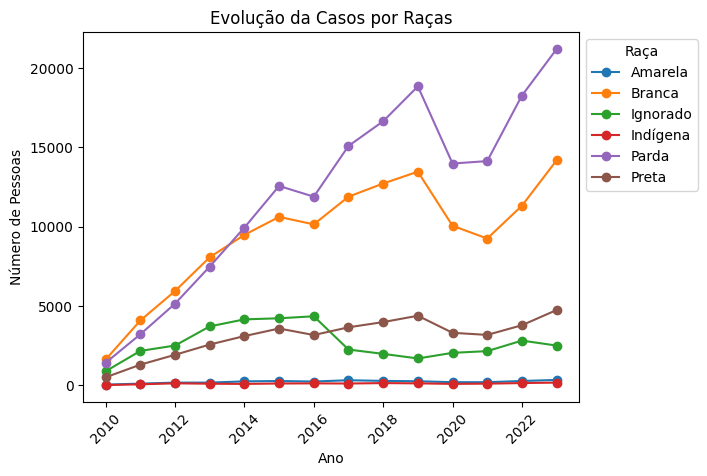

In [145]:
resultados_por_ano.clear()

# Loop pelos anos
for ano in anos:
    # Seleciona o dataframe correspondente ao ano atual
    mulher_ano_atual = globals()[f'mulher_{ano}']

    # Conta o número de pessoas em cada raça
    contagem_por_raca = mulher_ano_atual['CS_RACA'].value_counts().sort_index()

    # Adiciona os resultados para o ano atual à lista
    resultados_por_ano.append(contagem_por_raca)

# Concatena os resultados de todos os anos em um único dataframe
resultados_totais = pd.concat(resultados_por_ano, axis=1)

# Define os rótulos para os anos
anos_rotulos = [str(ano) for ano in anos]

# Define os anos como índice do dataframe
resultados_totais.columns = anos_rotulos

# Plota o gráfico de linha
resultados_totais.T.plot(marker='o')
plt.xlabel('Ano')
plt.ylabel('Número de Pessoas')
plt.title('Evolução da Casos por Raças')
plt.legend(title='Raça', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

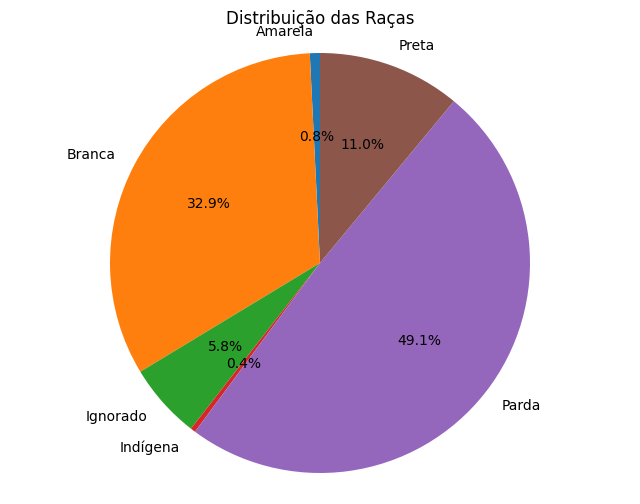

In [146]:
# Obtendo dados da coluna das raças e o total dos casos registrados
labels = resultados_totais.index.to_list()
values = resultados_totais.iloc[:, -1].tolist()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title('Distribuição das Raças')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.show()

Municipio da denuncia

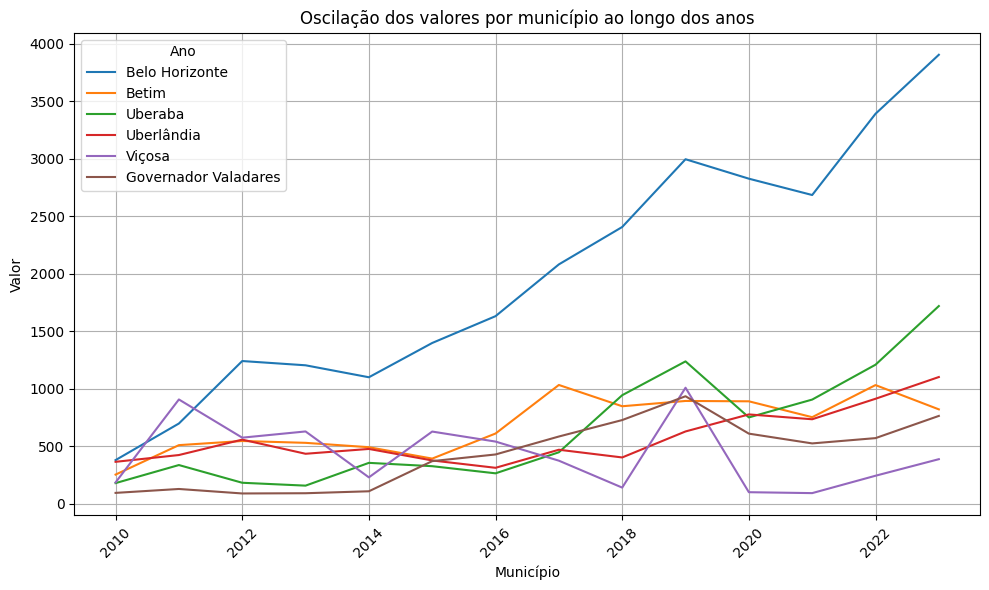

In [149]:
# Concatenando todos os dataframes em um único dataframe
mulher_concatenado = pd.concat(arquivo)

# Use value_counts() para obter a contagem de ocorrências de cada município
contagem_municipios = mulher_concatenado['ID_MN_RESI'].value_counts()

# Lista dos 6 municípios mais frequentes
top_6_municipios = contagem_municipios.head(6).index.tolist()

# Para cada município, realizar a contagem ao longo do tempo
for municipio in top_6_municipios:
  quantidade = []
  for ano in arquivo:
    quantidade.append(ano['ID_MN_RESI'].value_counts()[municipio])
  municipios[municipio] = quantidade

municipios = pd.DataFrame(municipios)

municipios.index = anos

# Plotar um gráfico de linhas para cada município
municipios.plot(kind='line', figsize=(10, 6))

# Adicionar rótulos e legendas ao gráfico
plt.xlabel('Município')
plt.ylabel('Valor')
plt.title('Oscilação dos valores por município ao longo dos anos')
plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Ajusta automaticamente o layout do gráfico para evitar sobreposição de elementos
plt.show()


In [148]:
# Dataframe com a evolução de número de casos, dos 6 municípios que mais tem casos
municipios

,Belo Horizonte,Betim,Uberaba,Uberlândia,Viçosa,Governador Valadares
2010,380,254,180,365,186,95
2011,698,510,337,424,907,129
2012,1241,546,183,558,575,90
2013,1204,530,158,435,629,92
2014,1100,492,356,477,230,109
2015,1398,393,327,377,628,371
2016,1631,611,265,313,541,429
2017,2081,1033,448,470,375,585
2018,2406,848,944,403,141,728
2019,2995,894,1238,629,1009,935
